# Grover's Algorithm for Sudoku

## Objectives:
* Code up and run a version of Grover's algorithm that can solve small versions of Sudoku puzzles like:

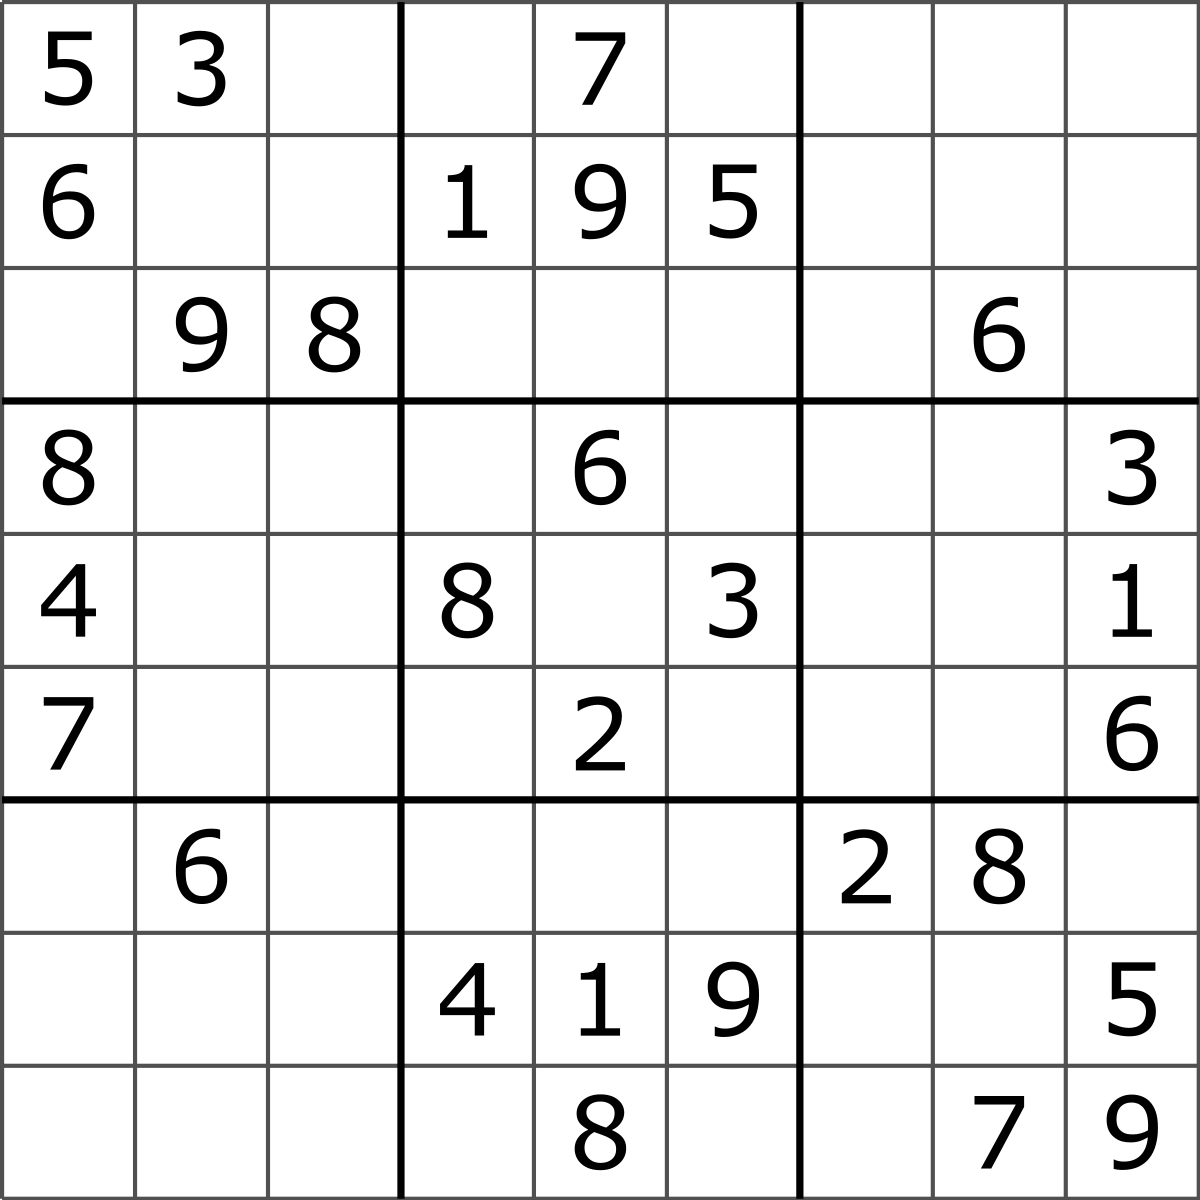

Where the rules to solve this are: 

* Using only the numbers 1-9
* No column may contain the same value twice
* No row may contain the same value twice
* No box may contain the same value twice


This lab is an abridged and Hankified version of https://qiskit.org/textbook/ch-algorithms/grover.html

## Initializing and predefined functions:

From the morning lab, <b>we need copy over</b> into the next 3 cells:
* Importing all the same modules
* `def initalize_s`
* `def diffuser`


In [4]:
#import all the things we need


In [5]:
#define initialize_s

In [6]:
#Define a function diffuser

## How to Solve Sudoku using Grover's Algorithm 
The oracles used this morning were created by knowing their solutions. Now, you will solve a 2×2 binary sudoku for which you do not know the solution beforehand. 

If we assign each square in our sudoku to a variable like so:

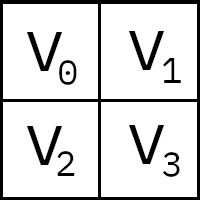

we want our circuit to output a solution to this sudoku.




## Turning the Problem into a Circuit

We want to create an oracle that will help us solve this problem, and we will start by creating a circuit that identifies a correct solution. To do this, we should create a _classical_ function on a quantum circuit that checks whether the state is a valid solution.

Since we need to check down both columns and across both rows, there are 4 conditions we need to check:

```
v0 ≠ v1   # check along top row
v2 ≠ v3   # check along bottom row
v0 ≠ v2   # check down left column
v1 ≠ v3   # check down right column
```

Remember we are comparing classical (computational basis) states. For convenience, we can compile this set of comparisons into a 2d list.

To create this 2d list, the rows should be pairs of bits that we don't want to allow to be the same, e.g. for v0 $\neq$ v1 we would make row `[0,1]`.

In [13]:
#Define a variable clause_list which holds all the pairs of bits
#which should not be equal


In our quantum computer, we will assign the value of each variable to a qubit in our circuit. Then, to check our clauses, we can pass each pair of qubits through an `XOR` gate. 

A classical `XOR`, or "exclusive or" gate takes two bits `a` and `b` and returns 0 if the two bits are the same, and 1 if the two are different.

Alas, the matrix to perform the classical `XOR` gate is not unitary, so it must be modified slightly for use on a quantum computer.  To do this, we need 3 qubits, `a`, `b`, and an output qubit to store the result.  Then, the quantum `XOR` is given by 2 CX gates



In the cell below, define a function `XOR` which take in a circuit, and 3 additional arguments for the input_0, input_1, and output qubits.

In the next cell, define a circuit with 3 qubits, pass them into XOR, and check by drawing that you have constructed the correct quantum XOR gate

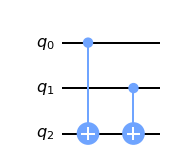

This circuit checks whether `q0 == q1` and stores the output to `q2`. To check each clause, we repeat this circuit for each pairing in `clause_list` and store the output to a new bit. 

In the next cell, we will perform this check.  To do so:

1. Define two variables, `var_qubits` and `clause_qubits`, which are made by calling `QuantumRegister(number_of_qubits, name="name_you_desire")` and storing it in those variables  Each register should be 4 qubits
2. Create a quatum circuit, which takes in both `var_qubits` and `clause_qubits`.  This can be done by `QuantumCircuit(var_qubits, clause_qubits)`
3. Use a for loop and XOR to check that every pair of variable qubits satisfies the clause_list constraints
4. Always good to check by drawing

A successfull circuit should look like:

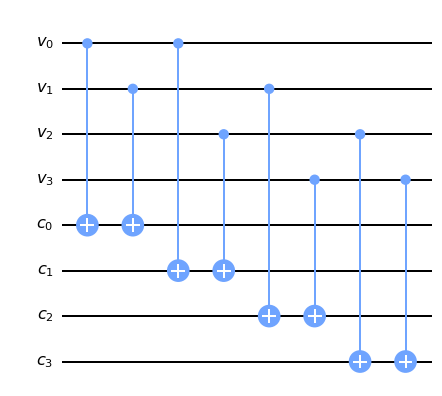

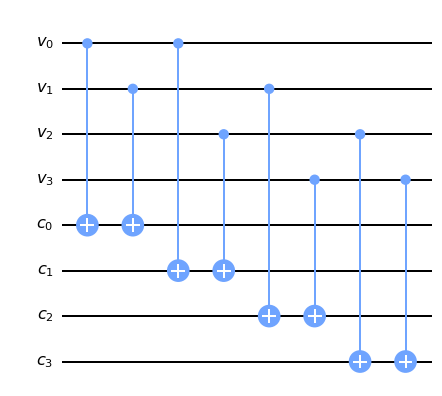

The final state of the bits `c0, c1, c2, c3` will only all be `1` in the case that the assignments of `v0, v1, v2, v3` are a solution to the sudoku. To complete our checking circuit, we want a single bit to be `1` if (and only if) all the clauses are satisfied. To do this, we can apply another multi-controlled-Toffoli-gate.

1. Copy your code from above
2. Add an additional Quantum register with 1 qubit, give that qubit the name 'out' and store this register as `output_qubit`
3. Modify your quantum circuit to also take in `output_qubit`
4. After performing all the XORs, apply a modified-controlled Toffoli gate where all the clause_qubits are controls and output_qubit is the target.

The circuit above takes as input an initial assignment of the bits `v0`, `v1`, `v2` and `v3`, and all other bits should be initialized to `0`. After running the circuit, the state of the `out0` bit tells us if this assignment is a solution or not; `out0 = 0` means the assignment _is not_ a solution, and `out0 = 1` means the assignment _is_ a solution.

## Uncomputing, and Completing the Oracle

We can now turn this checking circuit into a Grover oracle using [phase kickback](https://qiskit.org/textbook/ch-gates/phase-kickback.html). To recap, we have 3 registers: 
- One register which stores our sudoku variables (we'll say $x = v_3, v_2, v_1, v_0$)
- One register that stores our clauses (this starts in the state $|0000\rangle$ which we'll abbreviate to $|0\rangle^{\otimes 4}$)
- And one qubit ($|\text{out}_0\rangle$) that we've been using to store the output of our checking circuit. 

To create an oracle, we need our circuit ($U_\omega$) to perform the transformation:

$$
U_\omega|x\rangle|0\rangle^{\otimes 4}|\text{out}_0\rangle = |x\rangle|0\rangle^{\otimes 4}|\text{out}_0\oplus f(x)\rangle
$$

If we set the `out0` qubit to the superposition state $|{-}\rangle$ we have:

$$
\begin{aligned}
U_\omega|x\rangle|0\rangle^{\otimes 4}|{-}\rangle 
&= U_\omega|x\rangle|0\rangle^{\otimes 4}\otimes\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= |x\rangle|0\rangle^{\otimes 4}\otimes\tfrac{1}{\sqrt{2}}(|0\oplus f(x)\rangle - |1\oplus f(x)\rangle)
\end{aligned}
$$

If $f(x) = 0$, then we have the state:

$$
\begin{aligned}
&= |x\rangle|0\rangle^{\otimes 4}\otimes \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= |x\rangle|0\rangle^{\otimes 4}|-\rangle\\
\end{aligned}
$$


(i.e. no change). But if $f(x) = 1$ (i.e. $x = \omega$), we introduce a negative phase to the $|{-}\rangle$ qubit:

$$
\begin{aligned}
&= \phantom{-}|x\rangle|0\rangle^{\otimes 4}\otimes\tfrac{1}{\sqrt{2}}(|1\rangle - |0\rangle)\\
&= \phantom{-}|x\rangle|0\rangle^{\otimes 4}\otimes -\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\\
&= -|x\rangle|0\rangle^{\otimes 4}|-\rangle\\
\end{aligned}
$$

This is a functioning oracle that uses two auxiliary registers in the state $|0\rangle^{\otimes 4}|{-}\rangle$:

$$
U_\omega|x\rangle|0\rangle^{\otimes 4}|{-}\rangle = \Bigg\{
\begin{aligned}
\phantom{-}|x\rangle|0\rangle^{\otimes 4}|-\rangle \quad \text{for} \; x \neq \omega \\
-|x\rangle|0\rangle^{\otimes 4}|-\rangle \quad \text{for} \; x = \omega \\
\end{aligned}
$$

To adapt our checking circuit into a Grover oracle, we need to guarantee the bits in the second register (`c`) are always returned to the state $|0\rangle^{\otimes 4}$ after the computation. To do this, we simply repeat the for loop over XORs which guarantees `c0 = c1 = c2 = c3 = 0` after our circuit has run. We call this step _'uncomputation'_.

So in the next cell, lets define a function `sudoku_oracle` which takes in a circuit, a clause list, and the clause qubits.  This function should

1. Loop over all the clauses performing XORs
2. Implement a MCT gate to set the output qubit correctly (Assume that the circuit passed in will have a qubit called `output_qubit` to do this with.
3. Uncompute the XORs

In [26]:
#define sudoku_oracle

Time to test the your oracle and draw it.  Does it agree with

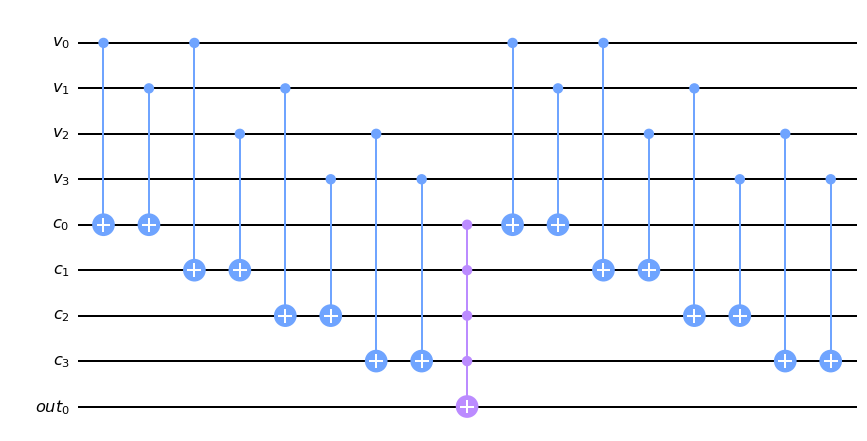

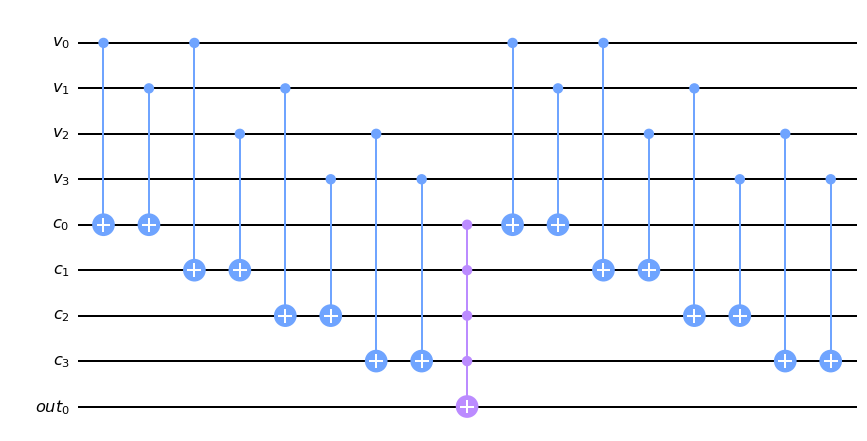

In [29]:
#Lets test the oracle circuit here

## Time to Go....The Full Algorithm
All that's left to do now is to put this oracle into Grover's algorithm.

Tips: 
* For ease of reading, make sure to put barriers between initialization, the oracle, and the diffuser.
* Since you don't know how many solutions are possible, lets perform 2 iterations of the oracle and diffuser.
* Make sure to perform a measurement, but remember the only interesting qubits are the var_qubits
* If you are tired of your circuits wrapping to a second line during draw, use `circuit.draw(fold=-1)`

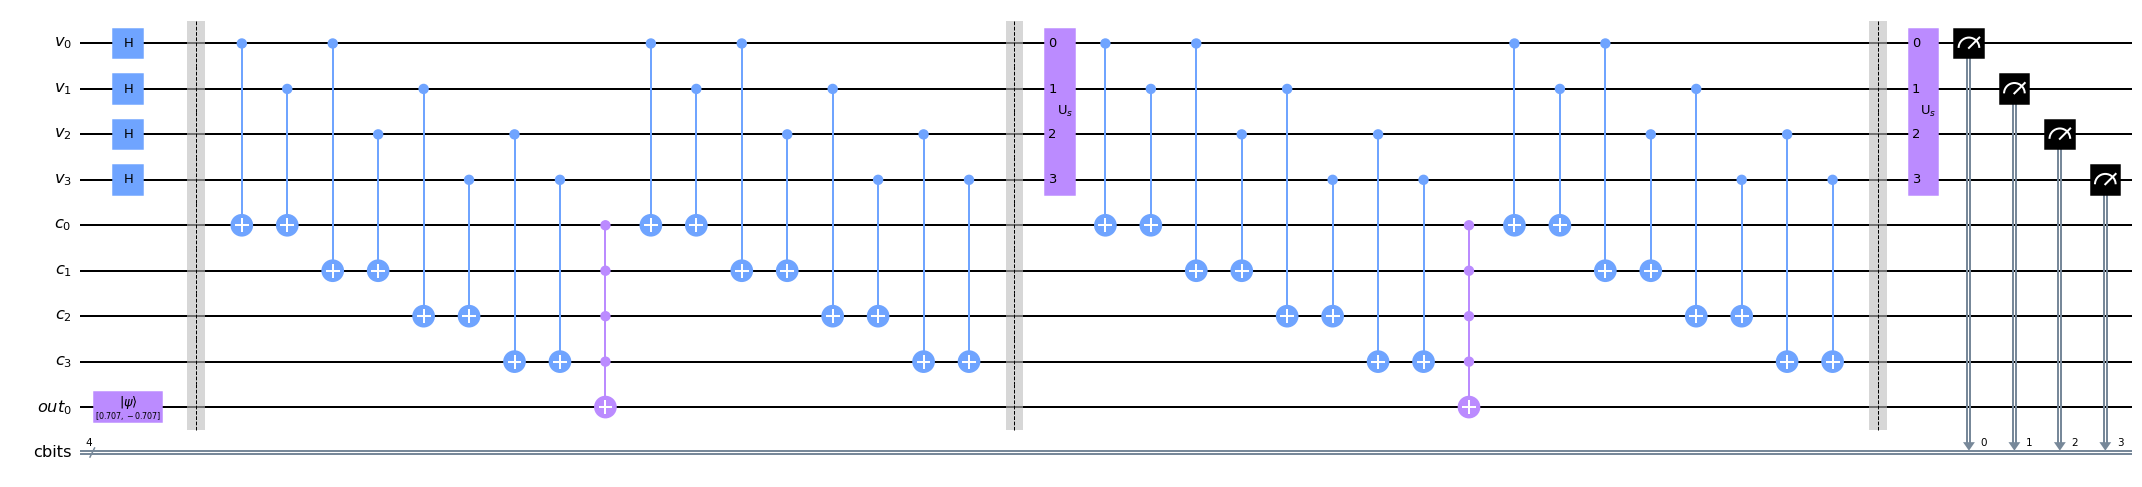

Put together the simulator and run.

In [27]:
# Simulate and plot results


There are two bit strings with hopefully a much higher measurement than any of the others, `0110` and `1001`. These correspond to the assignments:
```
v0 = 0
v1 = 1
v2 = 1
v3 = 0
```
and
```
v0 = 1
v1 = 0
v2 = 0
v3 = 1
```
which are the two solutions to our sudoku!